<font color='#43BFC7'>

# **Think Like a Data Scientist - EDA Exercise**</font>

The Seattle Fremont Bridge is a major birdge that connects two densely populated and historic neighborhoods in Seattle. Bicycle traffic surpasses 1 million rides annually. For this EDA exercise, city officials would like to see what can be learned from the data to predict bicycle traffic/demand (say, to help optimize load balancing).

You are provided with 2 datasets for this exercise:
1. `fremont-bridge-bicycle-counts.csv`: Bicycle counts from the inductive bicycle counters installed on both sides of the bridge since 2012.
2. `NOAA_Seattle-data.csv`: Weather and atmospheric data from NOAA, for the same period of time.

Your task is to explore the data and see what interesting findings you get from it! EDA exercises are by their nature very open ended. You often aren't given much direction in terms of what specifically to look for. Get a 'feel' for your data, see what's there, and think about how you might use it.
<font color='#43BFC7'>

**Goal: From your EDA, formulate 1 (or more) hypothesis that you'd like to test in a subsequent stage.**</font>

*Note that you are provided a data dictionary for the NOAA Seattle data,see NOAA_Seattle-data_dictionary.txt*.

### Import libraries and read in data

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

In [12]:
# Read in datasets:
fremont = pd.read_csv('fremont-bridge-bicycle-counts.csv')
noaa = pd.read_csv('NOAA_Seattle-data.csv')

### Begin EDA

In [13]:
# How big are the datasets (rows and columns)?
print(fremont.shape)
print(noaa.shape)

(62040, 4)
(2585, 28)


In [14]:
# Take a look at the data (the .head(n) method displays the top n rows):
fremont.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0


In [15]:
# Take a look at the other dataset:
noaa.head(3)

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,FOG,HEAVY-FOG_MIST,THUNDER,ICE-PELLETS,HAIL,GLAZE,SMOKE,BLOWING-SNOW,MIST,DRIZZLE,RAIN,SNOW.1,FREEZING-RAIN
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-03,16.33,NaN,0.0,0.0,0.0,NaN,66,46,10,20.0,23.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-04,14.54,NaN,0.0,0.0,0.0,NaN,66,47,20,20.0,21.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-05,12.75,NaN,0.0,0.0,0.0,NaN,71,48,360,360.0,17.9,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Take a look at the data types of your fields:
fremont.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [19]:
# This is how you can rename columns in your dataframe:
new_names = {
    'Date': 'date',
    'Fremont Bridge Total':'total',
    'Fremont Bridge East Sidewalk':'east_sw',
    'Fremont Bridge West Sidewalk':'west_sw',
}

fremont.rename(columns=new_names, inplace=True)
fremont.head(2)

,date,total,east_sw,west_sw
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0


In [24]:
# Let's convert the date field to a datetime type (instead of string):
fremont['date'] = pd.to_datetime(fremont['date'])

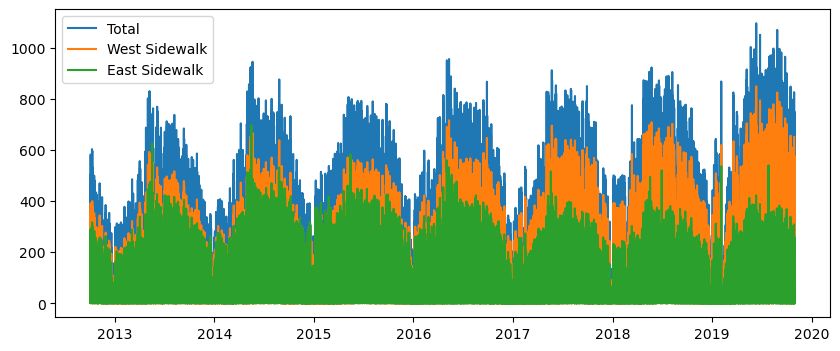

In [34]:
# Let's draw a basic plot:
plt.figure(figsize=(10, 4))
plt.plot(fremont['date'], fremont['total'], c='tab:blue', label='Total')
plt.plot(fremont['date'], fremont['west_sw'], c='tab:orange', label='West Sidewalk')
plt.plot(fremont['date'], fremont['east_sw'], c='tab:green', label='East Sidewalk')
plt.legend()
plt.show()

Notice anything interesting in the above graph?

### Now, your turn...